# **Logistic Regression**
$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

Tweet'lerde duygu analizi için lojistik regresyon uygulayacağız. Bir tweet verildiğinde, olumlu bir duygu mu yoksa olumsuz mu olduğuna karar vereceğiz.

*  Tweetler üzerinden lojistik regresyon ile model eğitimini,
*  Lojistik regresyon için features 'ların nasıl çıkarılacağını,
*  Doğal dil işleme ile lojistik regresyonun nasıl kullanıldığını,
*  Lojistik regresyonunun verdiği test sonuçlarını inceleyeceğiz




In [146]:
# utils.py dosyasını yüklüyoruz aşağıda module olarak kullanabilmek için.
#### content klasörünün içerisine yüklenir. ####
from google.colab import files 
uploaded = files.upload()

Saving utils.py to utils (1).py


In [ ]:
import nltk
from os import getcwd

In [ ]:
filePath = f"{getcwd()}/../tmp2/"
nltk.data.path.append(filePath)

In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 

from utils import process_tweet, build_freqs

In [ ]:
 #### Bu kod dosyayı root/nltk_data/corpara/twitter_samples yolu içerisine download eder. ####
 #nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

*  Tweetlerin 20% sini test için, 80% ini eğitim için kullanacağız.

In [ ]:
# Eğitim için 4000'e kadar olan kısmını
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

# Test için 4000 den sonrasını alıyoruz. (positive:5000 negative:5000 idi)
test_pos = all_positive_tweets[4000:] # veiyi test etmek için
test_neg = all_negative_tweets[4000:]


train_x = train_pos + train_neg
test_x = test_pos + test_neg
print("Eğitim için toplam tweet sayısı: ",len(train_x))
print("Test için toplam tweet sayısı: ",len(test_x))

Eğitim için toplam tweet sayısı:  8000
Test için toplam tweet sayısı:  2000


In [ ]:
# positive traning sayısı kadar 1'ler negatif training sayısı kadar 0'lar oluşturulur.
# bunları train labellara ekliyorum.
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [ ]:
#from nltk.corpus import stopwords          
#from utils import process_tweet 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# freqs dictionary'si oluşturulur.
freqs = build_freqs(train_x, train_y)

print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11346


In [ ]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


 **Sigmoid Fonksiyonu**

# 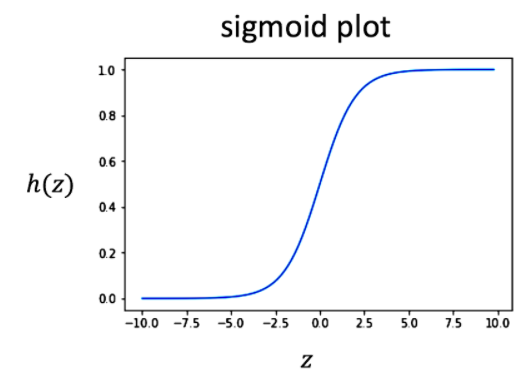


In [ ]:
# z: logistic regressionun predictionu. (tahmin fonksiyonu)
def sigmoid(z): 
    h = 1 / (1 + np.exp(-z))
    return h

In [ ]:
# Sigmoid i test ediyoruz.(çalışıyor mu?)

if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


# **Logistic regression: regression and a sigmoid**


Regression:$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$Burdaki $\theta$ değerleri Deep Learningteki "weights" yani ağırlık değerleri(w1,w2,..) olarak geçer.

Logistic regression$$ h(z) = \frac{1}{1+\exp^{-z}}$$$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Maliyet Fonksiyonu:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$


$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$



In [ ]:
# Model 1'e yakın tahmin ettiğinde, ancak gerçek etiket 0 olduğunda, kaybın büyük bir pozitif değer old. doğrulanır.
-1 * (1 - 0) * np.log(1 - 0.9999) 

9.210340371976294

In [ ]:
# Model 0'a yakın tahmin ettiğinde gerçek etiket de 0 olduğunda, kaybın büyük bir pozitif değer old. doğrulanır.
-1 * np.log(0.0001) 

9.210340371976182

## **Update the weights**

Weight vector ($\theta$ ) güncellenmesi şu şekilde olur:

Hata ne kadar azsa
maliyet fonksiyonu (cost function) $J$ o kadar küçük olur ve parametreleri yani $\theta_j$ leri o kadar az güncellerim. 

Buna da şu şekilde karar verilir: Herhangi bir parametreye göre hata fonksiyonunun türevi alınır. Çıkan sonuç o parametreyi güncellemek için bilgi verir.(Parametreyi artırmak/düşürmek gibi)

Hata fonksiyonunu 1 birim değiştirmek için $\theta_j$ 'yi ne kadar değiştirmemiz gerektiğini türev ile yani gradient descent ile bunu buluruz.

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j \tag{5}$$



$\theta_j$, güncellenmesi ve hatanın minimize edilmesi: $\alpha$ (learning rate):$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$


# **Implement gradient descent function**

*  num_iters: tüm eğitim setini kaç kez kullanacağımızın sayısı.

*  Tek bir seferde theta'yı güncellemek yerine tek bir seferde column vector üzerinden aynı anda güncelliyoruz:
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'. $z = \mathbf{x}\mathbf{\theta}$
** $\mathbf{x}$ in boyutu (m, n+1)
** $\mathbf{\theta}$ nın boyutu (n+1, 1)
** $\mathbf{z}$ nin boyutu (m, 1)
* $$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* $$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$


In [ ]:
# Her iterasyonda cost function tüm feauture lar için hesaplanır.
# Tek bir theta(i) güncellemek yerine hespini yukardaki column vector ile aynı anda güncelleriz.
# x: 800*3 lük matris, theta: 1*3 lük matris
# np.dot(dot porudct) dediğimizde transpozu alıp çarpar fonksiyon.
# cost u hespladıktan sonra gradientta h yi yerine koyup thetayı ne kadar güncellememiz gerektiğini buluruz.
def gradientDescent(x, y, theta, alpha, num_iters):

    # m: feauture sayısı
    m = x.shape[0]     
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta 
        # logit ler hesaplanır
        z = np.dot(x,theta)
        
        # yukarda yazdığımız sigmoid fonksiyonunu burda atadık
        # h prediction larımız olur
        h = sigmoid(z)
        
        # m tane tweet üzerinden ortalama hesaplanır
        # pozitif label ve negatif label lar için maliyet hesaplanır
        # hatamız hep pozitif olsun diye "-" ile çarptık, ortalama hata hesaplamak için de m' e böldük
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))      

        # her aşamada hatanın nasıl azaldığını görmek için                                              
        print("cost is: " + str(J))

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))
        
    J = float(J)
    return J, theta

In [ ]:
#### Gradient descent'ın(yukardaki fonksiyon) doğru yazılıp/yazılmadığını kontrol edilir####

np.random.seed(1)

# Sentetik 10*3 lük datalar oluşturur
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Sentetik 10 x 1 lik label lar oluşturur
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# gradient descent'ı 0(sıfır) ile initialize ettiği thetalarla 700 iterasyon kadar çalıştırır
# learnin rate'i (alpha) 10^(-8) verir. 
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

cost is: [[0.69314718]]
cost is: [[0.69305407]]
cost is: [[0.69296151]]
cost is: [[0.6928695]]
cost is: [[0.69277802]]
cost is: [[0.69268708]]
cost is: [[0.69259667]]
cost is: [[0.69250679]]
cost is: [[0.69241743]]
cost is: [[0.69232859]]
cost is: [[0.69224027]]
cost is: [[0.69215246]]
cost is: [[0.69206515]]
cost is: [[0.69197836]]
cost is: [[0.69189206]]
cost is: [[0.69180626]]
cost is: [[0.69172096]]
cost is: [[0.69163614]]
cost is: [[0.69155182]]
cost is: [[0.69146797]]
cost is: [[0.69138461]]
cost is: [[0.69130172]]
cost is: [[0.6912193]]
cost is: [[0.69113736]]
cost is: [[0.69105588]]
cost is: [[0.69097486]]
cost is: [[0.6908943]]
cost is: [[0.6908142]]
cost is: [[0.69073455]]
cost is: [[0.69065535]]
cost is: [[0.69057659]]
cost is: [[0.69049828]]
cost is: [[0.69042041]]
cost is: [[0.69034297]]
cost is: [[0.69026597]]
cost is: [[0.6901894]]
cost is: [[0.69011325]]
cost is: [[0.69003753]]
cost is: [[0.68996223]]
cost is: [[0.68988734]]
cost is: [[0.68981287]]
cost is: [[0.68973881

In [ ]:
#### Features Extraction(özellik çıkarımı)  ####
# tweet process edilip 3 boyutlu temsili sıfırlarla oluşturulur

def extract_features(tweet, freqs):
  
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    # bias terimi 1 yapılır
    x[0,0] = 1 
      
    # loop through each word in the list of words
    for word in word_l:
        
        # frekans dictionary kullanılarak features dahil edilir
        # pozitif için 1.0 verir eğer o kelime frekans dictionary'de yoksa(key yoksa) 0 değeri alır
        x[0,1] += freqs.get((word, 1.0),0)
        
        # negatif için de 0.0 versin yoksa 0 vermesi için
        x[0,2] += freqs.get((word, 0.0),0)
        
    assert(x.shape == (1, 3))
    return x

In [ ]:
#### Yukardaki fonk test edilmesi ###
# Buraya kadar tweet i aldık temizledik vektörel(3 boyutlu) hale getirdik

# test on training data
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.00e+00 3.02e+03 6.10e+01]]


In [ ]:
# test 2:
# seçilen kelimelerin frekans sözlüğünde olup/olmadığının kontrolü
tmp2 = extract_features('blob bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


## **Training Your Model**

To train the model:

In [ ]:
# training set'in boyutu 8000 idi burda 8000*3 lük matris oluşturulur
# training set'in en başta değerleri 0, veri kümesindeki tweetleri dolaşıp,
# extract_features'ı çağırıp X matrisinin i. elemanına atama yapar.
X = np.zeros((len(train_x), 3)) 
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

Y = train_y

# Tüm training dataset üzerinden 1500 kez geçer ve hatayı yani maliyeti hesaplar
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

cost is: [[0.69314718]]
cost is: [[0.69207586]]
cost is: [[0.69100783]]
cost is: [[0.68994309]]
cost is: [[0.68888162]]
cost is: [[0.6878234]]
cost is: [[0.68676844]]
cost is: [[0.68571671]]
cost is: [[0.6846682]]
cost is: [[0.68362291]]
cost is: [[0.68258083]]
cost is: [[0.68154193]]
cost is: [[0.68050622]]
cost is: [[0.67947368]]
cost is: [[0.67844429]]
cost is: [[0.67741806]]
cost is: [[0.67639496]]
cost is: [[0.67537498]]
cost is: [[0.67435812]]
cost is: [[0.67334436]]
cost is: [[0.67233369]]
cost is: [[0.6713261]]
cost is: [[0.67032159]]
cost is: [[0.66932013]]
cost is: [[0.66832171]]
cost is: [[0.66732634]]
cost is: [[0.66633399]]
cost is: [[0.66534465]]
cost is: [[0.66435832]]
cost is: [[0.66337497]]
cost is: [[0.66239461]]
cost is: [[0.66141722]]
cost is: [[0.66044279]]
cost is: [[0.65947131]]
cost is: [[0.65850276]]
cost is: [[0.65753714]]
cost is: [[0.65657444]]
cost is: [[0.65561464]]
cost is: [[0.65465774]]
cost is: [[0.65370372]]
cost is: [[0.65275257]]
cost is: [[0.651804

## **Test your logistic regression**

In [ ]:
#### Yukarda eğitilen model test edilmesi ###
# Bir tweet i alıp onu process edip, featureslarını çıkartıracak,
# sonra da modelin öğrenilmiş parametrelerini(theatalar) kullanarak sigmoid uygulayıp prediction ları bulur
def predict_tweet(tweet, freqs, theta):

    x = extract_features(tweet,freqs)
    y_pred = sigmoid(np.dot(x,theta))
    
    return y_pred

In [ ]:
# Fonksiyon test edilir
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

# I am happy için sigmoid 0.5 in üstünde verir

I am happy -> 0.518580
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530898
great great great -> 0.546273
great great great great -> 0.561561


In [ ]:
# Kendi tweet'imizi test ediyoruz
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.81636424]])

## **Check performance using the test set** 
Yukarıdaki eğitim setini kullanarak modeli eğittikten sonra, modelin gerçek, görünmeyen veriler üzerinde nasıl performans gösterebileceği test setiyle test edilir.

In [ ]:
def test_logistic_regression(test_x, test_y, freqs, theta):

    # predictions için liste
    y_hat = []
    
    for tweet in test_x:
        y_pred = predict_tweet(tweet, freqs, theta)
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)

    # Yukarıdaki uygulamayla, y_hat bir listedir, ancak test_y (m, 1) dizisidir
    # '==' operatörünü kullanarak karşılaştırmak için her ikisi de tek boyutlu dizilere dönüştürüldü
    
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    
    return accuracy

In [ ]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


In [ ]:
# Bazı analizler
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: @jaredNOTsubway @iluvmariah @Bravotv Then that truly is a LATERAL move! Now, we all know the Queen Bee is UPWARD BOUND : ) #MovingOnUp
THE PROCESSED TWEET IS: ['truli', 'later', 'move', 'know', 'queen', 'bee', 'upward', 'bound', 'movingonup']
1	0.49996890	b'truli later move know queen bee upward bound movingonup'
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48622857	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48370665	b"i'm play brain dot braindot"
THE TWEET IS: I'm p

In [145]:
# Kendi tweet imiz üzerinden sınıflandırma
my_tweet = 'bu dersi çok seviyorum :))'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['bu', 'dersi', 'çok', 'seviyorum', ':)']
[[0.81604987]]
Positive sentiment
